<a href="https://colab.research.google.com/github/mahiiC/Bioinformatics/blob/master/Breast_Cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [150]:
data = pd.read_csv('cancer.csv')
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80    1001.00   
1    842517         M        20.57         17.77          132.90    1326.00   
2  84300903         M        19.69         21.25          130.00    1203.00   
3  84348301         M        11.42         20.38           77.58     386.10   
4  84358402         M        20.29         14.34          135.10    1297.00   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0             0.12              0.28            0.30                 0.15   
1             0.08              0.08            0.09                 0.07   
2             0.11              0.16            0.20                 0.13   
3             0.14              0.28            0.24                 0.11   
4             0.10              0.13            0.20                 0.10   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60     2019.00              0.16   
1  ...          23.41           158.80     1956.00              0.12   
2  ...          25.53           152.50     1709.00              0.14   
3  ...          26.50            98.87      567.70              0.21   
4  ...          16.67           152.20     1575.00              0.14   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0               0.67             0.71                  0.27            0.46   
1               0.19             0.24                  0.19            0.28   
2               0.42             0.45                  0.24            0.36   
3               0.87             0.69                  0.26            0.66   
4               0.20             0.40                  0.16            0.24   

   fractal_dimension_worst  Unnamed: 32  
0                     0.12          NaN  
1                     0.09          NaN  
2                     0.09          NaN  
3                     0.17          NaN  
4                     0.08          NaN  

[5 rows x 33 columns]

In [151]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
count       569.00       569.00        569.00          569.00     569.00   
mean   30371831.43        14.13         19.29           91.97     654.89   
std   125020585.61         3.52          4.30           24.30     351.91   
min        8670.00         6.98          9.71           43.79     143.50   
25%      869218.00        11.70         16.17           75.17     420.30   
50%      906024.00        13.37         18.84           86.24     551.10   
75%     8813129.00        15.78         21.80          104.10     782.70   
max   911320502.00        28.11         39.28          188.50    2501.00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count           569.00            569.00          569.00               569.00   
mean              0.10              0.10            0.09                 0.05   
std               0.01              0.05            0.08                 0.04   
min               0.05              0.02            0.00                 0.00   
25%               0.09              0.06            0.03                 0.02   
50%               0.10              0.09            0.06                 0.03   
75%               0.11              0.13            0.13                 0.07   
max               0.16              0.35            0.43                 0.20   

       symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
count         569.00  ...         569.00           569.00      569.00   
mean            0.18  ...          25.68           107.26      880.58   
std             0.03  ...           6.15            33.60      569.36   
min             0.11  ...          12.02            50.41      185.20   
25%             0.16  ...          21.08            84.11      515.30   
50%             0.18  ...          25.41            97.66      686.50   
75%             0.20  ...          29.72           125.40     1084.00   
max             0.30  ...          49.54           251.20     4254.00   

       smoothness_worst  compactness_worst  concavity_worst  \
count            569.00             569.00           569.00   
mean               0.13               0.25             0.27   
std                0.02               0.16             0.21   
min                0.07               0.03             0.00   
25%                0.12               0.15             0.11   
50%                0.13               0.21             0.23   
75%                0.15               0.34             0.38   
max                0.22               1.06             1.25   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count                569.00          569.00                   569.00   
mean                   0.11            0.29                     0.08   
std                    0.07            0.06                     0.02   
min                    0.00            0.16                     0.06   
25%                    0.06            0.25                     0.07   
50%                    0.10            0.28                     0.08   
75%                    0.16            0.32                     0.09   
max                    0.29            0.66                     0.21   

       Unnamed: 32  
count         0.00  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [152]:
data.shape

(569, 33)

In [153]:
pd.isna(data).sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [154]:
data.drop('Unnamed: 32', axis=1,inplace =True)
data.drop('id',axis=1,inplace=True)
data

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80    1001.00   
1           M        20.57         17.77          132.90    1326.00   
2           M        19.69         21.25          130.00    1203.00   
3           M        11.42         20.38           77.58     386.10   
4           M        20.29         14.34          135.10    1297.00   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00    1479.00   
565         M        20.13         28.25          131.20    1261.00   
566         M        16.60         28.08          108.30     858.10   
567         M        20.60         29.33          140.10    1265.00   
568         B         7.76         24.54           47.92     181.00   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0               0.12              0.28            0.30                 0.15   
1               0.08              0.08            0.09                 0.07   
2               0.11              0.16            0.20                 0.13   
3               0.14              0.28            0.24                 0.11   
4               0.10              0.13            0.20                 0.10   
..               ...               ...             ...                  ...   
564             0.11              0.12            0.24                 0.14   
565             0.10              0.10            0.14                 0.10   
566             0.08              0.10            0.09                 0.05   
567             0.12              0.28            0.35                 0.15   
568             0.05              0.04            0.00                 0.00   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0             0.24  ...         25.38          17.33           184.60   
1             0.18  ...         24.99          23.41           158.80   
2             0.21  ...         23.57          25.53           152.50   
3             0.26  ...         14.91          26.50            98.87   
4             0.18  ...         22.54          16.67           152.20   
..             ...  ...           ...            ...              ...   
564           0.17  ...         25.45          26.40           166.10   
565           0.18  ...         23.69          38.25           155.00   
566           0.16  ...         18.98          34.12           126.70   
567           0.24  ...         25.74          39.42           184.60   
568           0.16  ...          9.46          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0       2019.00              0.16               0.67             0.71   
1       1956.00              0.12               0.19             0.24   
2       1709.00              0.14               0.42             0.45   
3        567.70              0.21               0.87             0.69   
4       1575.00              0.14               0.20             0.40   
..          ...               ...                ...              ...   
564     2027.00              0.14               0.21             0.41   
565     1731.00              0.12               0.19             0.32   
566     1124.00              0.11               0.31             0.34   
567     1821.00              0.17               0.87             0.94   
568      268.60              0.09               0.06             0.00   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                    0.27            0.46                     0.12  
1                    0.19            0.28                     0.09  
2                    0.24            0.36                     0.09  
3                    0.26            0.66                     0.17  
4                    0.16            0.24                     0.08  
..                    ...         

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [156]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(data['diagnosis'])
data['diagnosis'] = y
data

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80    1001.00   
1            1        20.57         17.77          132.90    1326.00   
2            1        19.69         21.25          130.00    1203.00   
3            1        11.42         20.38           77.58     386.10   
4            1        20.29         14.34          135.10    1297.00   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00    1479.00   
565          1        20.13         28.25          131.20    1261.00   
566          1        16.60         28.08          108.30     858.10   
567          1        20.60         29.33          140.10    1265.00   
568          0         7.76         24.54           47.92     181.00   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0               0.12              0.28            0.30                 0.15   
1               0.08              0.08            0.09                 0.07   
2               0.11              0.16            0.20                 0.13   
3               0.14              0.28            0.24                 0.11   
4               0.10              0.13            0.20                 0.10   
..               ...               ...             ...                  ...   
564             0.11              0.12            0.24                 0.14   
565             0.10              0.10            0.14                 0.10   
566             0.08              0.10            0.09                 0.05   
567             0.12              0.28            0.35                 0.15   
568             0.05              0.04            0.00                 0.00   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0             0.24  ...         25.38          17.33           184.60   
1             0.18  ...         24.99          23.41           158.80   
2             0.21  ...         23.57          25.53           152.50   
3             0.26  ...         14.91          26.50            98.87   
4             0.18  ...         22.54          16.67           152.20   
..             ...  ...           ...            ...              ...   
564           0.17  ...         25.45          26.40           166.10   
565           0.18  ...         23.69          38.25           155.00   
566           0.16  ...         18.98          34.12           126.70   
567           0.24  ...         25.74          39.42           184.60   
568           0.16  ...          9.46          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0       2019.00              0.16               0.67             0.71   
1       1956.00              0.12               0.19             0.24   
2       1709.00              0.14               0.42             0.45   
3        567.70              0.21               0.87             0.69   
4       1575.00              0.14               0.20             0.40   
..          ...               ...                ...              ...   
564     2027.00              0.14               0.21             0.41   
565     1731.00              0.12               0.19             0.32   
566     1124.00              0.11               0.31             0.34   
567     1821.00              0.17               0.87             0.94   
568      268.60              0.09               0.06             0.00   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                    0.27            0.46                     0.12  
1                    0.19            0.28                     0.09  
2                    0.24            0.36                     0.09  
3                    0.26            0.66                     0.17  
4                    0.16            0.24                     0.08  
..                    .

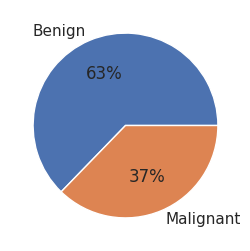

In [157]:
s = data['diagnosis'].value_counts()
plt.subplots(figsize=(3,3))
plt.pie(s, labels = ['Benign','Malignant'], autopct = '%1.0f%%')
plt.show()

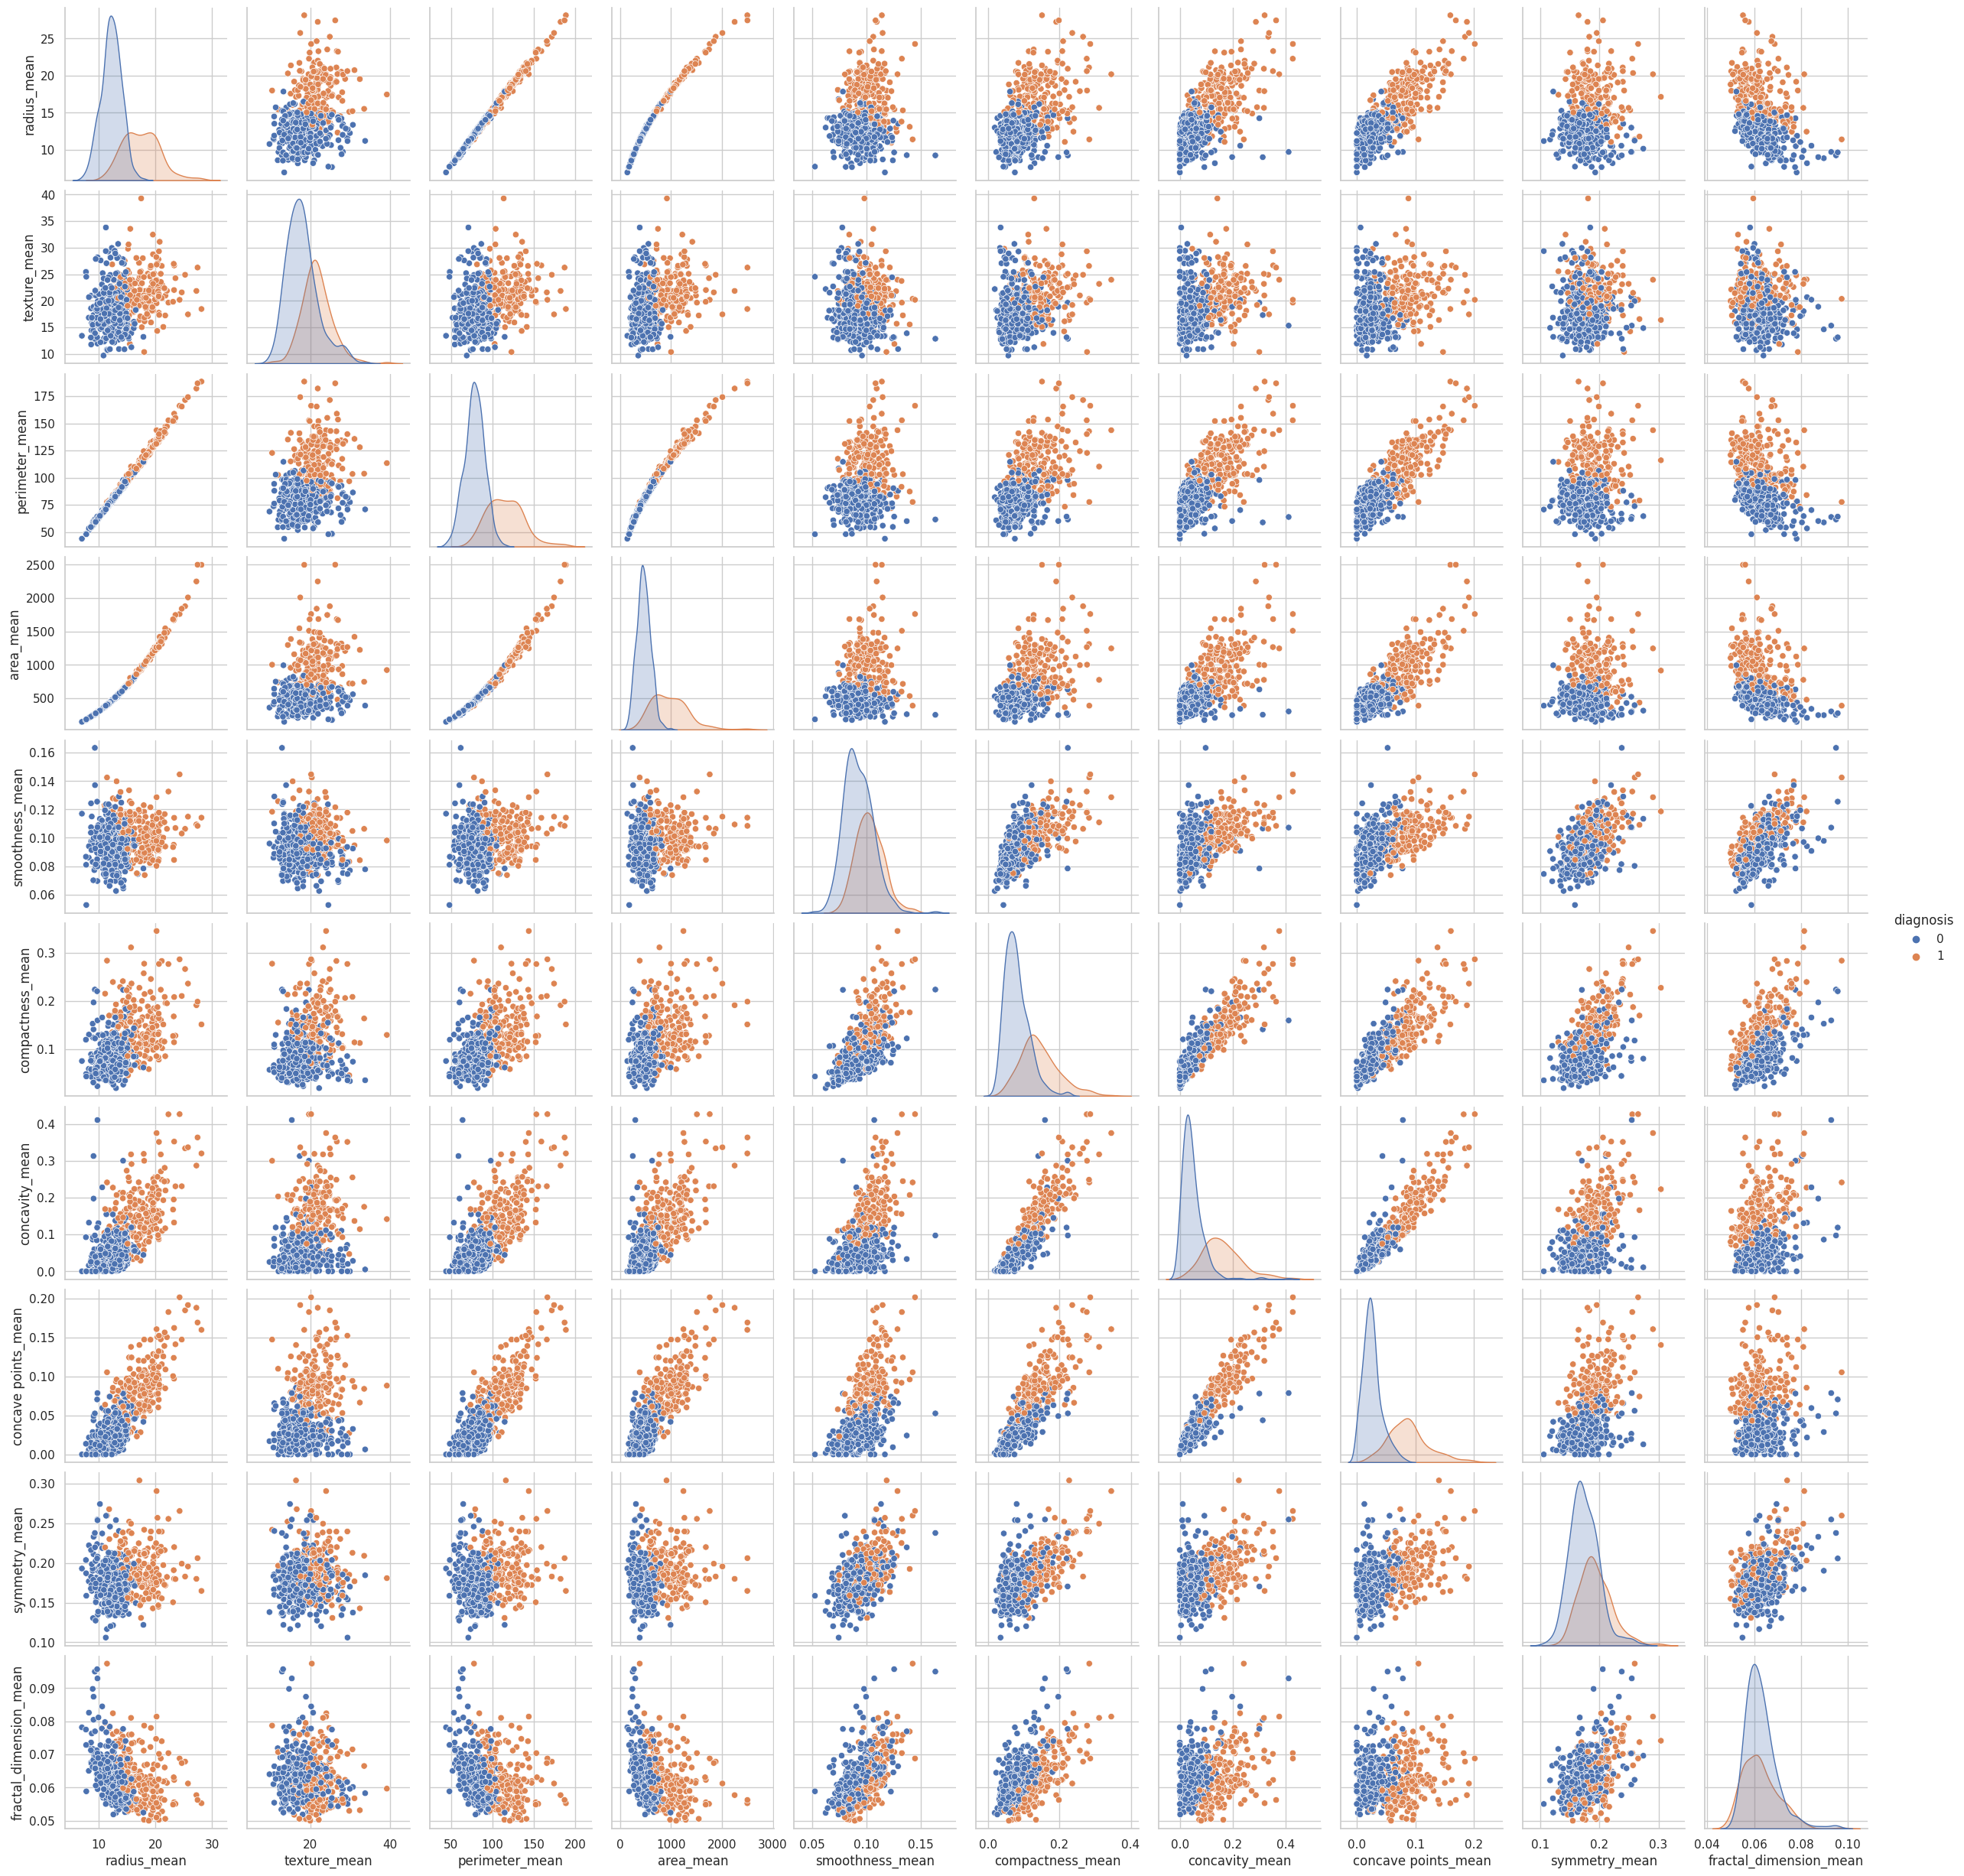

In [158]:
cols = list(data.columns)
sb.pairplot(data, hue = 'diagnosis', vars= cols[1:11])

We observe here that mean values of radius, perimeter, area, compactness, concavity, and concave points can be used for classification of tumours. This is because, larger values of these parameters shows correlation with malignancy. However, means of other features such as texture, smoothness, symmetry, and fractal dimension cannot be used for the same due to lack of such correlation depicted.

In [159]:
from sklearn.model_selection import train_test_split
X = data.drop(['diagnosis','texture_mean','smoothness_mean','symmetry_mean','fractal_dimension_mean'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=3)

In [160]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [96]:
! pip install lazypredict


In [161]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:02<00:00, 13.72it/s]


[LightGBM] [Info] Number of positive: 172, number of negative: 283
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3941
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378022 -> initscore=-0.497952
[LightGBM] [Info] Start training from score -0.497952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

100%|██████████| 29/29 [00:01<00:00, 18.15it/s]

[LightGBM] [Info] Number of positive: 172, number of negative: 283
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3941
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378022 -> initscore=-0.497952
[LightGBM] [Info] Start training from score -0.497952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [162]:
models_test

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
PassiveAggressiveClassifier        0.98               0.97     0.97      0.98   
Perceptron                         0.96               0.96     0.96      0.96   
LogisticRegression                 0.96               0.96     0.96      0.96   
SGDClassifier                      0.96               0.96     0.96      0.96   
LabelPropagation                   0.95               0.95     0.95      0.95   
LabelSpreading                     0.95               0.95     0.95      0.95   
CalibratedClassifierCV             0.96               0.95     0.95      0.96   
LinearSVC                          0.96               0.95     0.95      0.96   
SVC                                0.96               0.95     0.95      0.96   
AdaBoostClassifier                 0.95               0.94     0.94      0.95   
ExtraTreeClassifier                0.93               0.94     0.94      0.93   
KNeighborsClassifier               0.95               0.94     0.94      0.95   
LinearDiscriminantAnalysis         0.95               0.94     0.94      0.95   
RidgeClassifierCV                  0.95               0.94     0.94      0.95   
RidgeClassifier                    0.95               0.94     0.94      0.95   
XGBClassifier                      0.94               0.93     0.93      0.94   
QuadraticDiscriminantAnalysis      0.94               0.93     0.93      0.94   
LGBMClassifier                     0.94               0.93     0.93      0.94   
RandomForestClassifier             0.93               0.92     0.92      0.93   
BaggingClassifier                  0.92               0.92     0.92      0.92   
GaussianNB                         0.92               0.91     0.91      0.92   
ExtraTreesClassifier               0.92               0.91     0.91      0.92   
NuSVC                              0.92               0.90     0.90      0.92   
BernoulliNB                        0.91               0.90     0.90      0.91   
DecisionTreeClassifier             0.90               0.90     0.90      0.90   
NearestCentroid                    0.92               0.90     0.90      0.92   
DummyClassifier                    0.65               0.50     0.50      0.51   

                               Time Taken  
Model                                      
PassiveAggressiveClassifier          0.02  
Perceptron                           0.02  
LogisticRegression                   0.04  
SGDClassifier                        0.04  
LabelPropagation                     0.03  
LabelSpreading                       0.04  
CalibratedClassifierCV               0.06  
LinearSVC                            0.02  
SVC                                  0.06  
AdaBoostClassifier                   0.20  
ExtraTreeClassifier                  0.01  
KNeighborsClassifier                 0.02  
LinearDiscriminantAnalysis           0.02  
RidgeClassifierCV                    0.04  
RidgeClassifier                      0.02  
XGBClassifier                        0.07  
QuadraticDiscriminantAnalysis        0.02  
LGBMClassifier                       0.21  
RandomForestClassifier               0.25  
BaggingClassifier                    0.07  
GaussianNB                           0.02  
ExtraTreesClassifier                 0.15  
NuSVC                                0.04  
BernoulliNB                          0.01  
DecisionTreeClassifier               0.03  
NearestCentroid                      0.03  
DummyClassifier                      0.01

Let's proceed with Logistic Regression since is observed to have a great performance.

In [167]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)

In [168]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv = 5)
print("Cross-Validation Score: %0.2f %%" % (scores.mean()*100))

Cross-Validation Score: 97.58 %
